<a href="https://colab.research.google.com/github/Ziannnniiii/2025_AI_TI1B/blob/main/Jobsheet8%20Praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Praktikum

# 1.

<ipython-input-8-7248c99e16eb>:29: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.06675246  0.79753468  0.11069205  0.60129393  1.87685881 -0.57615058
  0.3069328   0.99377543 -1.16487283 -1.55735433  1.0918958  -0.18366908
  0.20881242  0.3069328  -1.16487283  0.11069205  2.07309956  0.40505317
  1.4843773  -0.37990983  1.87685881  0.11069205  0.89565505 -1.36111358
 -0.18366908 -0.57615058  0.99377543 -0.77239133  2.17121993  0.01257167
 -0.4780302   0.11069205  1.68061805  1.0918958   0.50317355 -1.06675246
 -1.16487283 -0.0855487   0.40505317 -0.28178945 -0.87051171  0.01257167
  0.6994143   1.58249768  0.79753468 -1.45923396 -0.0855487   0.40505317
 -0.28178945  1.28813655  0.11069205 -1.36111358  1.97497918 -1.26299321
  0.3069328  -0.96863208  0.40505317  0.40505317  0.79753468  0.89565505
 -0.4780302  -1.85171546  1.0918958  -0.67427095 -0.77239133  0.99377543
 -0.57615058 -0.0855487  -1.94983583  0.4050

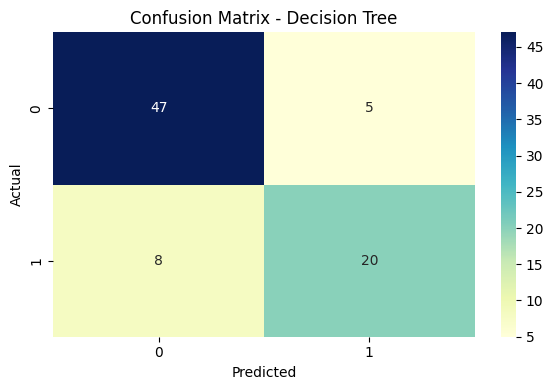

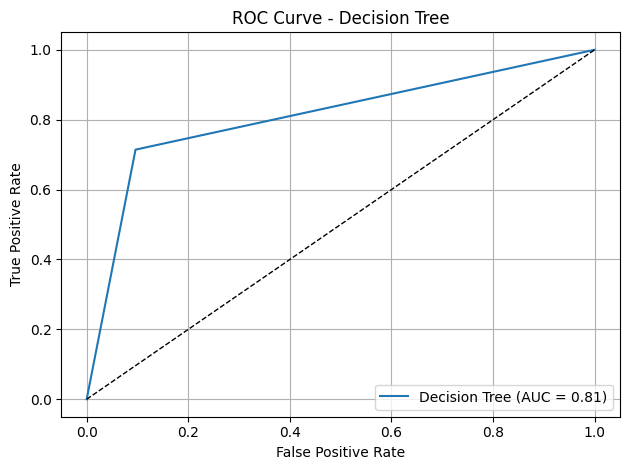

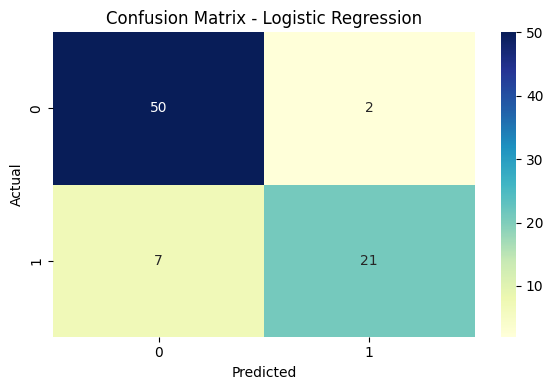

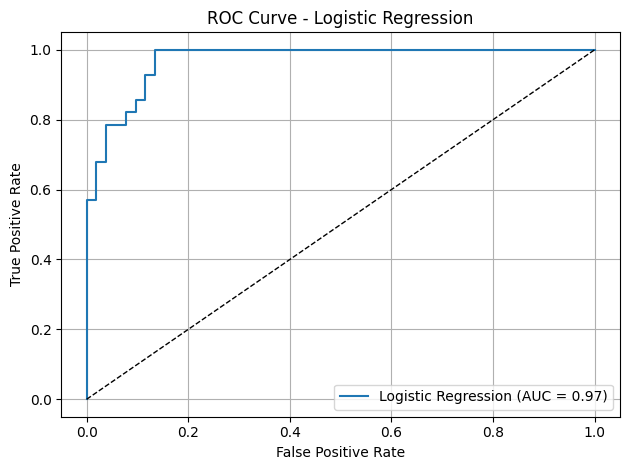


 Perbandingan Skor Model:



,Accuracy,Precision,Recall,F1
Decision Tree,0.837500,0.800000,0.714286,0.754717
Logistic Regression,0.887500,0.913043,0.750000,0.823529


<ipython-input-8-7248c99e16eb>:87: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance, y='Feature', x='Importance', palette='crest')


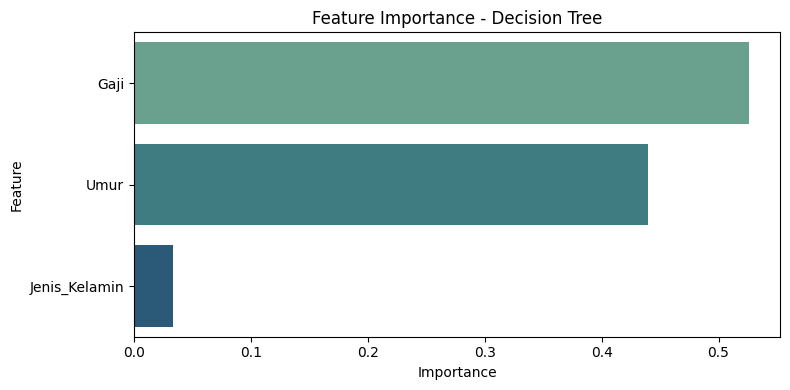

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('iklan_sosmed.csv', sep=';')

data = data.drop('ID', axis=1)

data['Jenis_Kelamin'] = LabelEncoder().fit_transform(data['Jenis_Kelamin'])

X = data[['Jenis_Kelamin', 'Umur', 'Gaji']]
y = data['Transaksi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train[['Umur', 'Gaji']] = scaler.fit_transform(X_train[['Umur', 'Gaji']])
X_test[['Umur', 'Gaji']] = scaler.transform(X_test[['Umur', 'Gaji']])

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred)
    rec = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)

    results[name] = {
        "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1
    }

    cm = confusion_matrix(y_test, pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, prob)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {name}')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

print("\n Perbandingan Skor Model:\n")
comparison = pd.DataFrame(results).T
display(comparison.style.background_gradient(cmap='YlOrBr'))

importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': models["Decision Tree"].feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(data=importance, y='Feature', x='Importance', palette='crest')
plt.title('🔍 Feature Importance - Decision Tree')
plt.show()


# 2.

📝 Kolom pada dataset: ['Tahun_Pengalaman', 'Gaji']

📊 Evaluasi Model Regresi Linear:
• Mean Absolute Error (MAE) : Rp 94,296,807.46
• Mean Squared Error (MSE) : Rp 11,211,771,792,579,374.00
• Root Mean Squared Error   : Rp 105,885,654.33
• Koefisien Determinasi (R²): 90.24%

📈 Persamaan Regresi:
   Gaji = 379,823,745.18 + (141,357,229.85 × Tahun Pengalaman)


<ipython-input-9-675ee873b2d9>:55: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


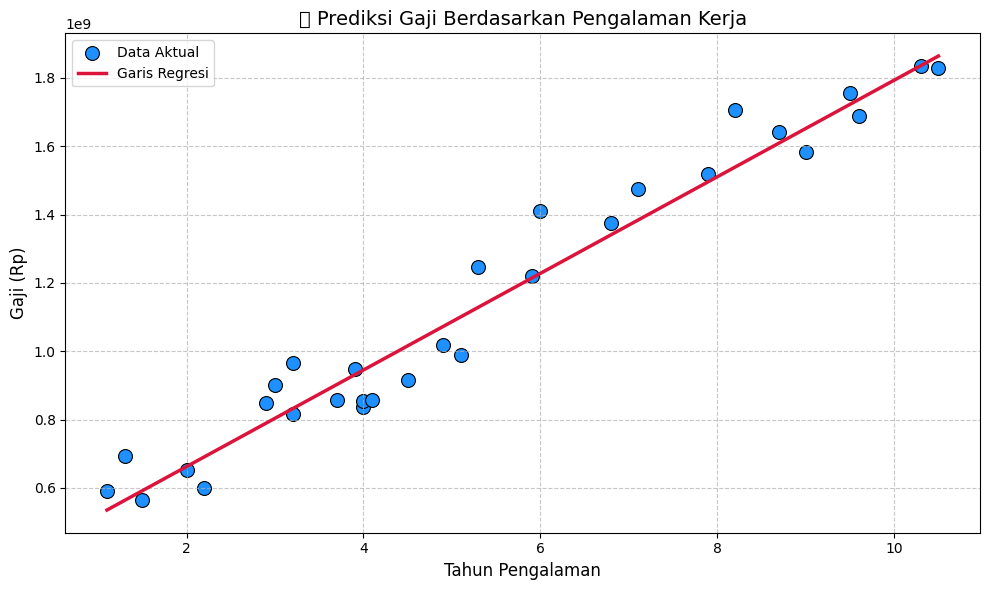


🔍 Prediksi Gaji Pegawai Berdasarkan Tahun Pengalaman:
•  0 tahun → Rp 379,823,745.18
•  2 tahun → Rp 662,538,204.87
•  5 tahun → Rp 1,086,609,894.40
• 10 tahun → Rp 1,793,396,043.63
• 15 tahun → Rp 2,500,182,192.86


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- BACA DATASET ---
data = pd.read_csv('Data_Gaji.csv', sep=';')
print("📝 Kolom pada dataset:", data.columns.tolist())

# --- PISAHKAN ATRIBUT & LABEL ---
X = data[['Tahun_Pengalaman']].values
y = data['Gaji'].values

# --- SPLIT DATA TRAIN & TEST ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# --- TRAIN MODEL ---
model = LinearRegression()
model.fit(X_train, y_train)

# --- PREDIKSI ---
y_pred = model.predict(X_test)

# --- METRIK EVALUASI ---
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n📊 Evaluasi Model Regresi Linear:")
print(f"• Mean Absolute Error (MAE) : Rp {mae:,.2f}")
print(f"• Mean Squared Error (MSE) : Rp {mse:,.2f}")
print(f"• Root Mean Squared Error   : Rp {rmse:,.2f}")
print(f"• Koefisien Determinasi (R²): {r2:.2%}")

# --- PERSAMAAN REGRESI ---
intercept = model.intercept_
slope = model.coef_[0]
print(f"\n📈 Persamaan Regresi:\n   Gaji = {intercept:,.2f} + ({slope:,.2f} × Tahun Pengalaman)")

# --- VISUALISASI REGRESI ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Tahun_Pengalaman'], y=data['Gaji'], color='dodgerblue', s=100, edgecolor='k', label='Data Aktual')
plt.plot(X, model.predict(X), color='crimson', linewidth=2.5, label='Garis Regresi')
plt.xlabel('Tahun Pengalaman', fontsize=12)
plt.ylabel('Gaji (Rp)', fontsize=12)
plt.title('📈 Prediksi Gaji Berdasarkan Pengalaman Kerja', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- PREDIKSI DATA BARU ---
contoh_pengalaman = np.array([[0], [2], [5], [10], [15]])
prediksi_batch = model.predict(contoh_pengalaman)

print("\n🔍 Prediksi Gaji Pegawai Berdasarkan Tahun Pengalaman:")
for thn, gaji in zip(contoh_pengalaman.flatten(), prediksi_batch):
    print(f"• {thn:2d} tahun → Rp {gaji:,.2f}")


# 4.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# ==============================
# 📥 Load & Preprocessing Data
# ==============================
print("\n📥 Memuat dataset...")
dataset = pd.read_csv('iklan_sosmed.csv', delimiter=';')

# Mengambil fitur dan label
X = dataset.iloc[:, [2, 3]].values  # Umur & Gaji
y = dataset.iloc[:, 4].values       # Target Transaksi

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standarisasi fitur numerik
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# ==============================
# 🌳 Decision Tree - Grid Search
# ==============================
print("\n🔧 Parameter Tuning untuk Decision Tree...\n")

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_dt = GridSearchCV(
    DecisionTreeClassifier(random_state=0),
    param_grid_dt,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

grid_search_dt.fit(X_train, y_train)

# Evaluasi hasil terbaik
best_classifier_dt = grid_search_dt.best_estimator_
accuracy_dt_tuned = accuracy_score(y_test, best_classifier_dt.predict(X_test))

print(f"✅ Best Parameters       : {grid_search_dt.best_params_}")
print(f"📊 Akurasi Cross-Validation : {grid_search_dt.best_score_:.4f}")
print(f"🎯 Akurasi Test Set         : {accuracy_dt_tuned:.4f}")

# ==============================
# 📈 Logistic Regression - Grid Search
# ==============================
print("\n🔧 Parameter Tuning untuk Logistic Regression...\n")

param_grid_lr = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

grid_search_lr = GridSearchCV(
    LogisticRegression(random_state=0, max_iter=200),
    param_grid_lr,
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

grid_search_lr.fit(X_train, y_train)

# Evaluasi hasil terbaik
best_classifier_lr = grid_search_lr.best_estimator_
accuracy_lr_tuned = accuracy_score(y_test, best_classifier_lr.predict(X_test))

print(f"✅ Best Parameters       : {grid_search_lr.best_params_}")
print(f"📊 Akurasi Cross-Validation : {grid_search_lr.best_score_:.4f}")
print(f"🎯 Akurasi Test Set         : {accuracy_lr_tuned:.4f}")

# ==============================
# 🔍 Perbandingan Akurasi
# ==============================
print("\n" + "="*40)
print("🔍 PERBANDINGAN AKURASI SETELAH TUNING")
print("="*40)
print(f"🌳 Decision Tree         : {accuracy_dt_tuned:.4f}")
print(f"📈 Logistic Regression   : {accuracy_lr_tuned:.4f}")

if accuracy_dt_tuned > accuracy_lr_tuned:
    print("✅ Hasil: *Decision Tree memiliki akurasi yang lebih tinggi.*")
elif accuracy_lr_tuned > accuracy_dt_tuned:
    print("✅ Hasil: *Logistic Regression memiliki akurasi yang lebih tinggi.*")
else:
    print("✅ Hasil: *Kedua algoritma memiliki akurasi yang sama.*")



📥 Memuat dataset...

🔧 Parameter Tuning untuk Decision Tree...

✅ Best Parameters       : {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
📊 Akurasi Cross-Validation : 0.8900
🎯 Akurasi Test Set         : 0.9400

🔧 Parameter Tuning untuk Logistic Regression...

✅ Best Parameters       : {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
📊 Akurasi Cross-Validation : 0.8367
🎯 Akurasi Test Set         : 0.9100

🔍 PERBANDINGAN AKURASI SETELAH TUNING
🌳 Decision Tree         : 0.9400
📈 Logistic Regression   : 0.9100
✅ Hasil: *Decision Tree memiliki akurasi yang lebih tinggi.*
